# CMSC320 CHECKPOINT 2

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Checking out our initial dataframe
growth_df = pd.read_csv('gdp_growth.csv', index_col = 'Country Name')
growth_df

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN,NaN
Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.972652,4.308370,3.986754,2.925591,2.019391,2.542298,2.475272,2.077898,-2.939186,NaN
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,NaN
Africa Western and Central,AFW,NaN,1.848719,3.770212,7.272501,5.396356,4.049794,-1.787094,-9.546521,1.465741,...,5.142964,6.104241,5.927350,2.745937,0.127595,2.318042,2.952230,3.190336,-0.884981,NaN
Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644,-5.399987,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.712195,5.340908,3.348804,5.916270,5.571757,4.825690,3.406631,4.756831,-5.340275,NaN
"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.392886,4.823415,-0.188574,-27.994546,-9.375124,-5.071796,0.752447,NaN,NaN,NaN
South Africa,ZAF,NaN,3.844751,6.177883,7.373613,7.939782,6.122761,4.438308,7.196576,4.153445,...,2.396232,2.485468,1.413826,1.321862,0.664552,1.157947,1.487617,0.113054,-6.431975,NaN


In [52]:
# CLEAN UP

# Removing extraneous data columns
growth_df.drop('Code', axis=1, inplace=True)
growth_df.drop('Unnamed: 65', axis=1, inplace=True)

print(growth_df.isnull().sum())

1960    266
1961    147
1962    142
1963    142
1964    142
       ... 
2016     12
2017     12
2018     13
2019     15
2020     22
Length: 61, dtype: int64


Clearly there is a significant dearth of GDP information for a number of countries early on in the dataset. We rectify the data through iterative imputation:

In [55]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=100, max_iter=10)

# Imputation
df = growth_df.copy()
imputer.fit(df)
imputed_df = imputer.transform(df)
df.loc[:,'1961':'2020'] = imputed_df

# Dropping 1960 outlier data because of the significant number of NA values
df.drop('1960', axis=1, inplace=True)
df.isnull().sum().head()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


1961    0
1962    0
1963    0
1964    0
1965    0
dtype: int64

We begin by examining significantly positive correlation relations of the United States.

In [56]:
for i in range(1,266):
  data = df.loc['United States'].corr(df.iloc[i,:])
  if data > 0.6 and data < 1:
    print(df.iloc[i,:].name)
    print(data)


Antigua and Barbuda
0.6592434533839486
Barbados
0.6334416433225233
Canada
0.6551067693951337
Costa Rica
0.6023532659561198
Cayman Islands
0.7254200925934021
Denmark
0.6183783291442236
Europe & Central Asia
0.6700703337653637
Euro area
0.6230151227693668
European Union
0.6370452543630116
United Kingdom
0.6629982893103994
High income
0.8691277679990556
Honduras
0.670868256436353
Croatia
0.6064644077466537
North America
0.9994853898829917
Netherlands
0.6241425094972212
OECD members
0.8758223211043544
Post-demographic dividend
0.8752637795339937
San Marino
0.6516659794562767
Slovenia
0.6278652692432571
World
0.8222438149879217


America and its global domestic production is moderately and most closely correlated with its parent nation, the UK. Unsurprisingly, it is heavily correlated with North America and the world as a whole.

Interestingly, **America's GDP is closely correlated with high income worldwide.** We verify this with a visual diagram.

<Axes: >

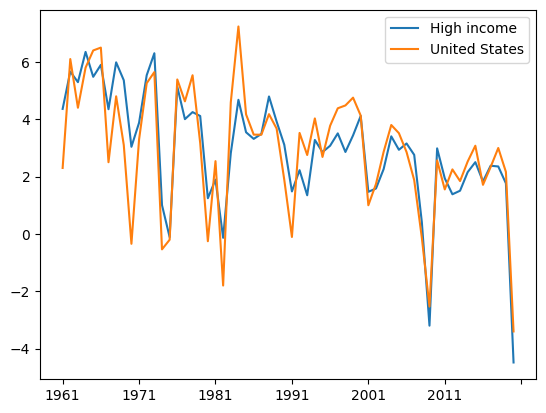

In [57]:
df.loc['High income'].plot(legend=True)
df.loc['United States'].plot(legend=True)

Next we investigate some negative correlations.

In [58]:
for i in range(1,266):
  data = df.loc['United States'].corr(df.iloc[i,:])
  if data < -0.2:
    print(df.iloc[i,:].name)
    print(data)


Afghanistan
-0.23516677565789265
Ethiopia
-0.24098928629103106
Guyana
-0.33922961569224047
New Caledonia
-0.30248704130499354
Senegal
-0.21896877724249927
Timor-Leste
-0.31651796172343294
Uganda
-0.2248952946425174


There are a number of explanations for the lack of heavy negative correlations, a cursory examination indicating that as America and the world are closely tied, and since both GDPs have increased, those with negative correlations must need be outliers. Further examination may be informative.

We now turn our attention to the world to investigate correlations between every nation group:

In [61]:
for i in range(1,266):
  for j in range(1,266):
    data = df.iloc[i,:].corr(df.iloc[j,:])
    if data > 0.95 and data < 0.999999:
      print(df.iloc[i,:].name, ',', df.iloc[j,:].name)
      print(data)


Africa Western and Central , IDA blend
0.9669741534991734
Africa Western and Central , Nigeria
0.9839276164890447
China , East Asia & Pacific (excluding high income)
0.9628448629839929
China , East Asia & Pacific (IDA & IBRD countries)
0.9628371360863841
East Asia & Pacific (excluding high income) , China
0.9628448629839929
Europe & Central Asia (excluding high income) , Russian Federation
0.9541091633886457
Europe & Central Asia (excluding high income) , Europe & Central Asia (IDA & IBRD countries)
0.9964553964989866
Europe & Central Asia , Euro area
0.9587800020113285
Europe & Central Asia , European Union
0.9705539220751394
Euro area , Europe & Central Asia
0.9587800020113286
Euro area , European Union
0.9972869319615402
Euro area , France
0.9518832907994753
European Union , Europe & Central Asia
0.9705539220751392
European Union , Euro area
0.9972869319615402
European Union , France
0.9516916631426564
Fragile and conflict affected situations , Pre-demographic dividend
0.96823106598

No surprises here, however the data set presents a problem in the form of a great deal of unwanted extraneous data. In the future the data set may be pruned further to remove all but nation state information.
We shall skip the converse examination for the same reasons.

The Pearson correlation helps to intuit a bird's eye view, but it has its limits. In following reports, our team will endeavour to apply some normal and nonparametric tests to the data.